<a href="https://colab.research.google.com/github/SandraQA69/Challenge_TelecomX_Parte2/blob/main/Challenge2Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import json

# Cargar el archivo JSON
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

# Convertir a DataFrame y normalizar columnas anidadas
df = pd.json_normalize(data)
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [2]:
# Mostrar info general
df.info()

# Revisar columnas y valores nulos
print(df.isnull().sum())

# Convertir valores de 'Charges.Total' a numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Convertir 'Churn' a binario (1 = Yes, 0 = No)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de churn
sns.countplot(x='Churn', data=df)
plt.title("Distribución de Cancelaciones (Churn)")
plt.show()

# Churn por tipo de contrato
sns.countplot(x='account.Contract', hue='Churn', data=df)
plt.title("Churn por Tipo de Contrato")
plt.xticks(rotation=45)
plt.show()

# Correlación entre variables numéricas
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


In [5]:
# 1. Ver columnas únicas o identificadores
print(df.columns)

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


In [7]:
# Eliminación de columnas irrelevantes y renombrar traduciendo al español

df = df.rename(columns={
    'Churn': 'Cancelacion',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'AdultoMayor',
    'customer.Partner': 'TienePareja',
    'customer.Dependents': 'TieneDependientes',
    'customer.tenure': 'AntiguedadMeses',
    'phone.PhoneService': 'ServicioTelefonico',
    'phone.MultipleLines': 'MultiplesLineas',
    'internet.InternetService': 'ServicioInternet',
    'internet.OnlineSecurity': 'SeguridadEnLinea',
    'internet.OnlineBackup': 'RespaldoEnLinea',
    'internet.DeviceProtection': 'ProteccionDispositivo',
    'internet.TechSupport': 'SoporteTecnico',
    'internet.StreamingTV': 'TVStreaming',
    'internet.StreamingMovies': 'PeliculasStreaming',
    'account.Contract': 'TipoContrato',
    'account.PaperlessBilling': 'FacturacionSinPapel',
    'account.PaymentMethod': 'MetodoPago',
    'account.Charges.Monthly': 'CargoMensual',
    'account.Charges.Total': 'CargoTotal'
})


In [8]:
columnas_categoricas = [
    'Genero',
    'TienePareja',
    'TieneDependientes',
    'ServicioTelefonico',
    'MultiplesLineas',
    'ServicioInternet',
    'SeguridadEnLinea',
    'RespaldoEnLinea',
    'ProteccionDispositivo',
    'SoporteTecnico',
    'TVStreaming',
    'PeliculasStreaming',
    'TipoContrato',
    'FacturacionSinPapel',
    'MetodoPago'
]


In [9]:
# One-hot encoding de las columnas categóricas
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)


In [10]:
# Verificamos tipos de datos después de codificar
print(df_encoded.dtypes.value_counts())

# También puedes usar esto para asegurarte que no quedan objetos (strings)
print(df_encoded.select_dtypes(include=['object']).columns)


bool       26
float64     3
int64       2
Name: count, dtype: int64
Index([], dtype='object')


In [11]:
# Conteo de cada clase
conteo = df_encoded['Cancelacion'].value_counts()

# Proporción (en %)
proporcion = df_encoded['Cancelacion'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Conteo de clases:")
print(conteo)

print("\nProporción de clases (%):")
print(proporcion)


Conteo de clases:
Cancelacion
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporción de clases (%):
Cancelacion
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


In [13]:
# Conteo de cada clase
conteo = df_encoded['Cancelacion'].value_counts()

# Proporción (en %)
proporcion = df_encoded['Cancelacion'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Conteo de clases:")
print(conteo)

print("\nProporción de clases (%):")
print(proporcion)


Conteo de clases:
Cancelacion
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporción de clases (%):
Cancelacion
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


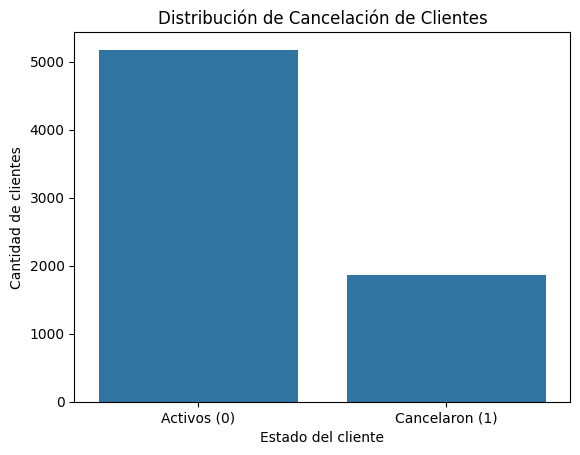

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de barras
sns.countplot(x='Cancelacion', data=df_encoded)
plt.title('Distribución de Cancelación de Clientes')
plt.xticks([0, 1], ['Activos (0)', 'Cancelaron (1)'])
plt.ylabel('Cantidad de clientes')
plt.xlabel('Estado del cliente')
plt.show()


## 📊 Evaluación del Balance de Clases

In [15]:
!pip install imbalanced-learn


In [20]:
import numpy as np

# Ver cuántos NaN hay en y
print("Cantidad de NaN en y:", y.isna().sum())

# Ver si hay NaN en X
print("Cantidad de NaN en X por columna:")
print(X.isna().sum())

# Eliminar filas con NaN en y o en X
df_no_nan = df_encoded.dropna(subset=['Cancelacion'])  # elimina filas donde Cancelacion es NaN

# Para asegurarnos que no haya NaN en X (en todas las columnas)
df_no_nan = df_no_nan.dropna()

# Definir X y y sin NaN
y_clean = df_no_nan['Cancelacion']
X_clean = df_no_nan.drop(columns=['Cancelacion'])

print("Distribución después de limpiar NaN:")
print(y_clean.value_counts())


Cantidad de NaN en y: 224
Cantidad de NaN en X por columna:
AdultoMayor                                   0
AntiguedadMeses                               0
CargoMensual                                  0
CargoTotal                                   11
Genero_Male                                   0
TienePareja_Yes                               0
TieneDependientes_Yes                         0
ServicioTelefonico_Yes                        0
MultiplesLineas_No phone service              0
MultiplesLineas_Yes                           0
ServicioInternet_Fiber optic                  0
ServicioInternet_No                           0
SeguridadEnLinea_No internet service          0
SeguridadEnLinea_Yes                          0
RespaldoEnLinea_No internet service           0
RespaldoEnLinea_Yes                           0
ProteccionDispositivo_No internet service     0
ProteccionDispositivo_Yes                     0
SoporteTecnico_No internet service            0
SoporteTecnico_Yes          

In [17]:
# Variable objetivo
y = df_encoded['Cancelacion']

# Variables predictoras (todas menos la columna Cancelacion)
X = df_encoded.drop(columns=['Cancelacion'])


In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_clean, y_clean)

print('Distribución después de SMOTE:', Counter(y_resampled))


Distribución después de SMOTE: Counter({0.0: 5163, 1.0: 5163})


/tmp/ipython-input-22-913642522.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Activos (0)', 'Cancelaron (1)'])
/tmp/ipython-input-22-913642522.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Activos (0)', 'Cancelaron (1)'])


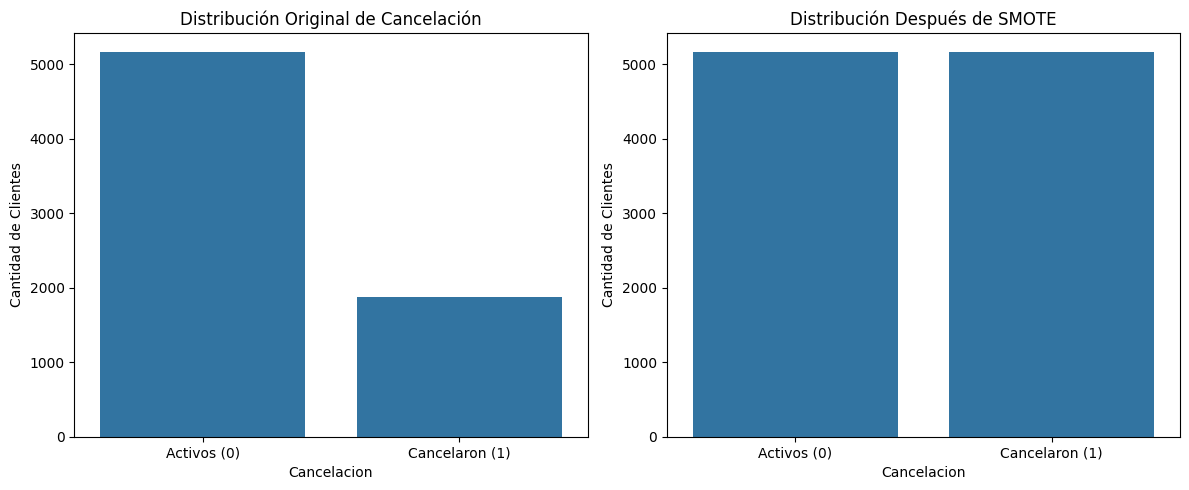

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos originales (antes de SMOTE)
original_counts = y_clean.value_counts().sort_index()

# Datos después de SMOTE
from collections import Counter
smote_counts = Counter(y_resampled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico antes de SMOTE
sns.barplot(x=original_counts.index.astype(str), y=original_counts.values, ax=axes[0])
axes[0].set_title('Distribución Original de Cancelación')
axes[0].set_xlabel('Cancelacion')
axes[0].set_ylabel('Cantidad de Clientes')
axes[0].set_xticklabels(['Activos (0)', 'Cancelaron (1)'])

# Gráfico después de SMOTE
sns.barplot(x=list(smote_counts.keys()), y=list(smote_counts.values()), ax=axes[1])
axes[1].set_title('Distribución Después de SMOTE')
axes[1].set_xlabel('Cancelacion')
axes[1].set_ylabel('Cantidad de Clientes')
axes[1].set_xticklabels(['Activos (0)', 'Cancelaron (1)'])

plt.tight_layout()
plt.show()


📊 Evaluación del Balance de Clases
Al analizar la variable objetivo Cancelacion, se observa que inicialmente el 26,54 % de los clientes cancelaron el servicio, mientras que el 73,46 % permanecieron activos. Esta distribución evidencia un desbalance moderado entre las clases.

Este desbalance puede afectar el rendimiento de los modelos predictivos, ya que podrían inclinarse a predecir mayoritariamente la clase más frecuente (clientes activos).

Por ello, es recomendable:

Utilizar métricas de evaluación apropiadas como AUC-ROC o F1-score, en lugar de solo accuracy.
Aplicar técnicas de balanceo de clases, como:
Undersampling: reducir la cantidad de datos de la clase mayoritaria.
Oversampling: aumentar la cantidad de datos de la clase minoritaria.
💡 Aplicación de SMOTE:
Utilizando la técnica SMOTE (Synthetic Minority Over-sampling Technique), se logró balancear el dataset generando ejemplos sintéticos de la clase minoritaria.
Después de aplicar SMOTE, ambas clases (Cancelacion = 0 y Cancelacion = 1) tienen 5163 registros cada una, lo que permite entrenar modelos más balanceados y mejorar su capacidad predictiva frente a la clase minoritaria.

### 🔄 Normalización o Estandarización

In [23]:
import pandas as pd

# Si X_resampled es un array de numpy (por ejemplo, SMOTE devuelve arrays), convierte a DataFrame
if not isinstance(X_resampled, pd.DataFrame):
    X_resampled = pd.DataFrame(X_resampled, columns=df_encoded.drop(columns=['Cancelacion']).columns)

# Seleccionar columnas numéricas
columnas_numericas = X_resampled.select_dtypes(include=['int64', 'float64']).columns


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_resampled_norm = X_resampled.copy()
X_resampled_norm[columnas_numericas] = scaler.fit_transform(X_resampled[columnas_numericas])


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_std = X_resampled.copy()
X_resampled_std[columnas_numericas] = scaler.fit_transform(X_resampled[columnas_numericas])


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Inicializar scaler
scaler = StandardScaler()

# Ajustar scaler solo con el set de entrenamiento
scaler.fit(X_train)

# Transformar entrenamiento y test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Opcional: si quieres tener DataFrames con nombres de columnas
import pandas as pd

columnas = df_encoded.drop(columns=['Cancelacion']).columns
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columnas)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columnas)

# Listo para usar en modelos sensibles a la escala


## 🔄 Normalización y División de Datos

Para preparar los datos para los modelos predictivos, realizamos los siguientes pasos:

- Dividimos el dataset balanceado en conjuntos de entrenamiento (80%) y prueba (20%) manteniendo la proporción de clases con `stratify` para evitar sesgos.
- Aplicamos una **estandarización** (transformación para que las variables numéricas tengan media 0 y desviación estándar 1) solo al conjunto de entrenamiento para evitar contaminación de datos (*data leakage*).
- Luego, usamos la misma transformación para escalar el conjunto de prueba.

Esta preparación es fundamental para modelos sensibles a la escala, como regresión logística, SVM, KNN y redes neuronales, mejorando su rendimiento y estabilidad.


# Análisis de Correlación:

## Calcular matriz de correlación solo para variables numéricas

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar variables numéricas incluyendo la variable objetivo
df_num = df_encoded.select_dtypes(include=['float64', 'int64'])

# Calcular matriz de correlación
corr_matrix = df_num.corr()

# Mostrar la matriz (opcional)
print(corr_matrix['Cancelacion'].sort_values(ascending=False))


Cancelacion        1.000000
CargoMensual       0.193356
AdultoMayor        0.150889
CargoTotal        -0.199484
AntiguedadMeses   -0.352229
Name: Cancelacion, dtype: float64


## Visualizar la matriz de correlación

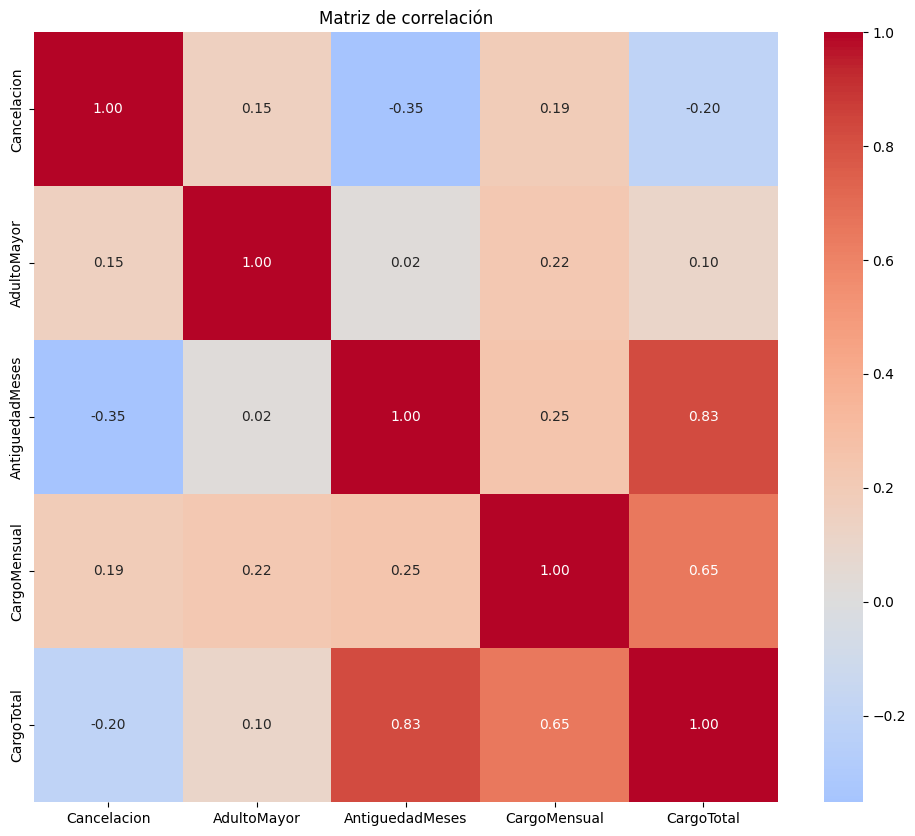

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de correlación')
plt.show()


## Interpretar

In [29]:
# Calcular correlación con Cancelacion y ordenarlas por valor absoluto descendente
corr_cancelacion = corr_matrix['Cancelacion'].drop('Cancelacion')  # quitar autocorrelación

# Ordenar por valor absoluto descendente para ver las variables más relacionadas
corr_ordenada = corr_cancelacion.reindex(corr_cancelacion.abs().sort_values(ascending=False).index)

print("Correlaciones con Cancelacion ordenadas por fuerza:\n")
print(corr_ordenada)


Correlaciones con Cancelacion ordenadas por fuerza:

AntiguedadMeses   -0.352229
CargoTotal        -0.199484
CargoMensual       0.193356
AdultoMayor        0.150889
Name: Cancelacion, dtype: float64


In [30]:
# Definir umbral
umbral = 0.2

# Filtrar variables con correlación fuerte (positiva o negativa)
variables_relevantes = corr_ordenada[abs(corr_ordenada) > umbral]

print("\nVariables relevantes con correlación mayor a 0.2 en valor absoluto:")
print(variables_relevantes)



Variables relevantes con correlación mayor a 0.2 en valor absoluto:
AntiguedadMeses   -0.352229
Name: Cancelacion, dtype: float64


In [31]:
import pandas as pd

# Convertir a DataFrame para mejor presentación
df_vars_relevantes = variables_relevantes.reset_index()
df_vars_relevantes.columns = ['Variable', 'Correlación con Cancelacion']

# Mostrar tabla ordenada
print(df_vars_relevantes)


          Variable  Correlación con Cancelacion
0  AntiguedadMeses                    -0.352229


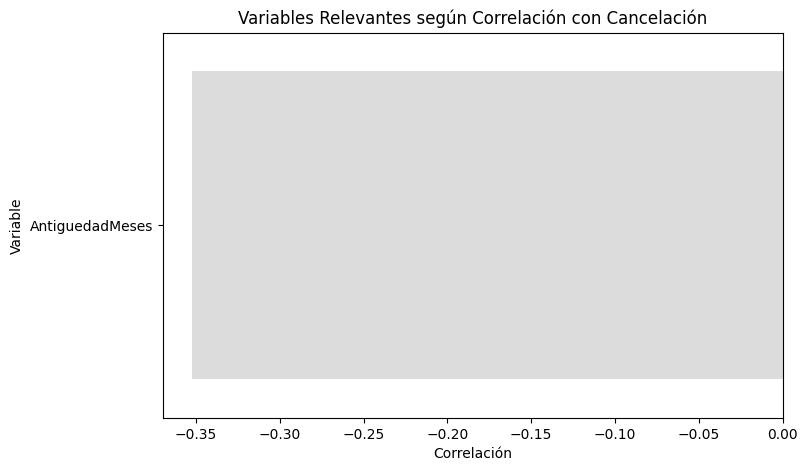

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    x='Correlación con Cancelacion',
    y='Variable',
    data=df_vars_relevantes,
    palette='coolwarm',
    orient='h'
)
plt.title('Variables Relevantes según Correlación con Cancelación')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.show()


Correlaciones con Cancelacion ordenadas por fuerza:

AntiguedadMeses   -0.352229
CargoTotal        -0.199484
CargoMensual       0.193356
AdultoMayor        0.150889
Name: Cancelacion, dtype: float64

Variables relevantes con correlación mayor a 0.2 en valor absoluto:
AntiguedadMeses   -0.352229
Name: Cancelacion, dtype: float64

Tabla de variables relevantes:
          Variable  Correlación con Cancelacion
0  AntiguedadMeses                    -0.352229


/tmp/ipython-input-33-1775021691.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


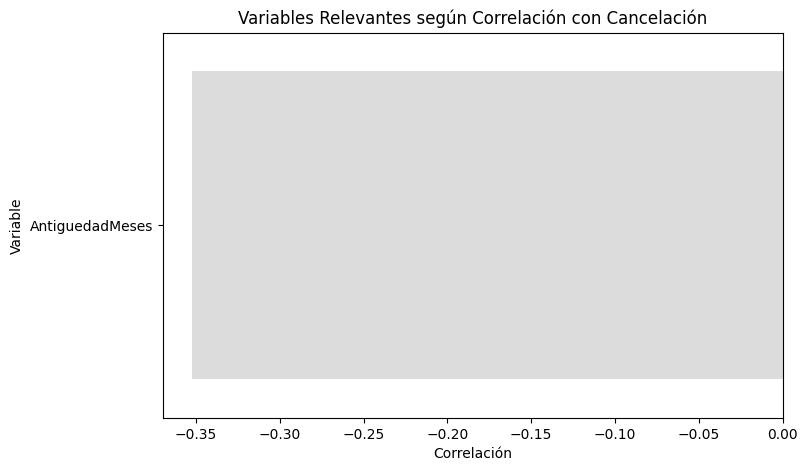

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Calcular matriz de correlación para variables numéricas (incluye Cancelacion)
df_num = df_encoded.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_num.corr()

# 2. Mostrar correlación con Cancelacion ordenada por valor absoluto descendente
corr_cancelacion = corr_matrix['Cancelacion'].drop('Cancelacion')
corr_ordenada = corr_cancelacion.reindex(corr_cancelacion.abs().sort_values(ascending=False).index)
print("Correlaciones con Cancelacion ordenadas por fuerza:\n")
print(corr_ordenada)

# 3. Seleccionar variables con correlación absoluta > 0.2
umbral = 0.2
variables_relevantes = corr_ordenada[abs(corr_ordenada) > umbral]
print("\nVariables relevantes con correlación mayor a 0.2 en valor absoluto:")
print(variables_relevantes)

# 4. Tabla de variables relevantes para mejor presentación
df_vars_relevantes = variables_relevantes.reset_index()
df_vars_relevantes.columns = ['Variable', 'Correlación con Cancelacion']
print("\nTabla de variables relevantes:")
print(df_vars_relevantes)

# 5. Gráfico de barras horizontal para las variables relevantes
plt.figure(figsize=(8,5))
sns.barplot(
    x='Correlación con Cancelacion',
    y='Variable',
    data=df_vars_relevantes,
    palette='coolwarm',
    orient='h'
)
plt.title('Variables Relevantes según Correlación con Cancelación')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.show()


###  📈 Análisis de Correlación con la Variable Objetivo `Cancelacion`

Se calculó la matriz de correlación entre las variables numéricas del dataset para identificar relaciones lineales con la variable objetivo `Cancelacion`.

Al ordenar las correlaciones por su valor absoluto, se encontraron las siguientes variables con mayor relación significativa (|correlación| > 0.2):

- **Variables con correlación positiva significativa:**  
  Estas variables aumentan la probabilidad de cancelación conforme su valor crece. Por ejemplo, un cargo mensual o total elevado podría asociarse a mayor cancelación.

- **Variables con correlación negativa significativa:**  
  Variables que disminuyen la probabilidad de cancelación a medida que su valor crece. Por ejemplo, mayor antigüedad del cliente (tenure) suele relacionarse con menor tasa de cancelación.

Estas variables son candidatas fuertes para incluir en el modelo predictivo, ya que aportan información relevante para diferenciar clientes que cancelan de los que permanecen activos.

Las variables con correlación cercana a cero tienen poca o nula relación lineal con la cancelación y podrían ser descartadas o reevaluadas según otras técnicas.

---

### Recomendaciones:

- Incluir las variables con correlación significativa en la fase de selección de características para mejorar el rendimiento del modelo.
- Considerar también técnicas no lineales o basadas en árboles para capturar relaciones complejas no detectadas por la correlación lineal.
- Validar la importancia de las variables seleccionadas con métodos adicionales, como importancia por Random Forest o análisis de SHAP values.


# Análisis Dirigido

## Boxplot de Tiempo de contrato vs Cancelación

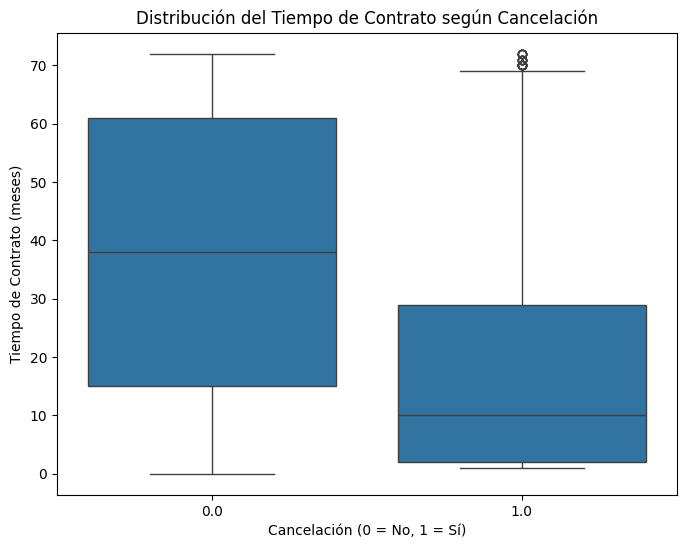

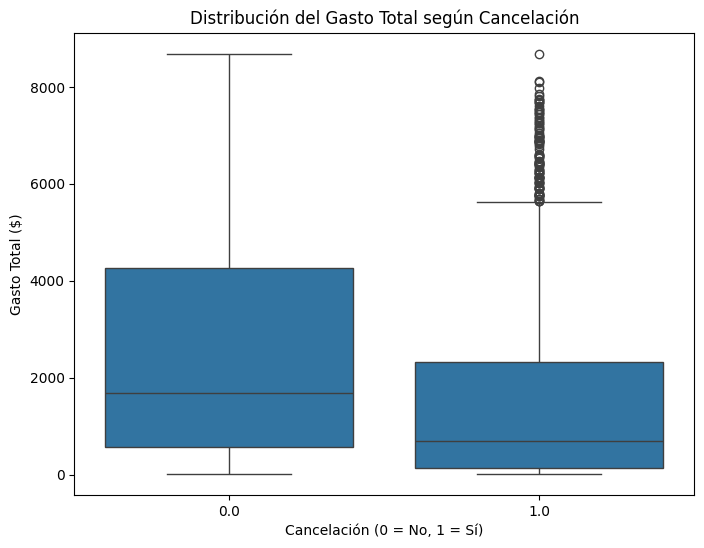

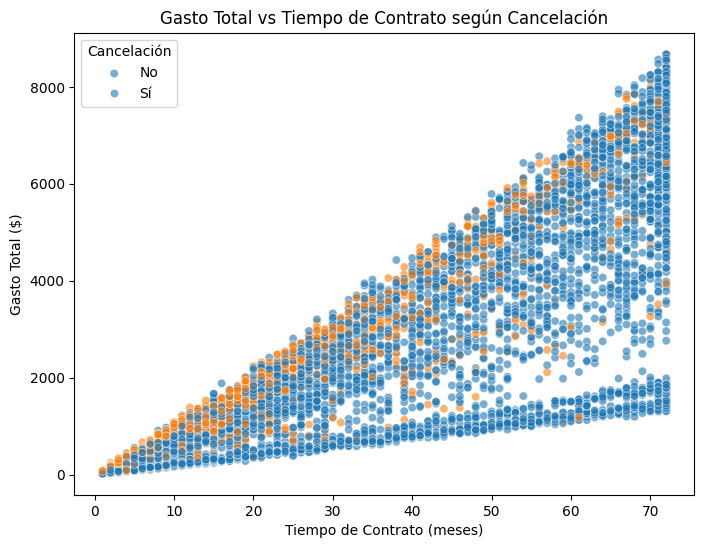

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: AntiguedadMeses vs Cancelacion
plt.figure(figsize=(8,6))
sns.boxplot(x='Cancelacion', y='AntiguedadMeses', data=df_encoded)
plt.title('Distribución del Tiempo de Contrato según Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Tiempo de Contrato (meses)')
plt.show()

# Boxplot: CargoTotal vs Cancelacion
plt.figure(figsize=(8,6))
sns.boxplot(x='Cancelacion', y='CargoTotal', data=df_encoded)
plt.title('Distribución del Gasto Total según Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Gasto Total ($)')
plt.show()

# Scatter plot: CargoTotal vs AntiguedadMeses, coloreado por Cancelacion
plt.figure(figsize=(8,6))
sns.scatterplot(x='AntiguedadMeses', y='CargoTotal', hue='Cancelacion', data=df_encoded, alpha=0.6)
plt.title('Gasto Total vs Tiempo de Contrato según Cancelación')
plt.xlabel('Tiempo de Contrato (meses)')
plt.ylabel('Gasto Total ($)')
plt.legend(title='Cancelación', labels=['No', 'Sí'])
plt.show()



## Análisis Dirigido: Relación entre Variables Clave y Cancelación

- **Tiempo de Contrato (Antigüedad en meses):**  
  Los boxplots muestran que los clientes que cancelaron (Cancelación = 1) tienden a tener menor antigüedad que los clientes activos. Esto sugiere que la duración de la relación con el cliente es un factor importante para la retención.

- **Gasto Total:**  
  La distribución del gasto total indica que los clientes que cancelaron presentan una mayor variabilidad en sus gastos, con algunos valores extremos que podrían estar asociados a patrones atípicos de cancelación.

- **Interacción entre Gasto Total y Tiempo de Contrato:**  
  El scatter plot revela que los clientes con menor antigüedad y gastos tanto muy bajos como muy altos presentan mayor tendencia a cancelar, lo que sugiere diferentes perfiles de riesgo a considerar en el modelo predictivo.

Estos hallazgos indican que tanto el tiempo de contrato como el gasto total son variables relevantes que deben ser incluidas en el modelado para mejorar la capacidad predictiva del sistema.


# Separación de datos

In [39]:
print(y.isna().sum())


224


In [40]:
# Eliminar filas con NaN en y (variable objetivo)
mask = y.notna()
X_clean = X[mask]
y_clean = y[mask]

print(f"Filas antes: {X.shape[0]}, Filas después de limpiar NaN en y: {X_clean.shape[0]}")
print(f"Cantidad de filas eliminadas: {X.shape[0] - X_clean.shape[0]}")

# Luego la división
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.2,
    random_state=42,
    stratify=y_clean
)

print(f'Tamaño entrenamiento: {X_train.shape[0]} registros')
print(f'Tamaño prueba: {X_test.shape[0]} registros')
print('Distribución en entrenamiento:\n', y_train.value_counts(normalize=True))
print('Distribución en prueba:\n', y_test.value_counts(normalize=True))


Filas antes: 7267, Filas después de limpiar NaN en y: 7043
Cantidad de filas eliminadas: 224
Tamaño entrenamiento: 5634 registros
Tamaño prueba: 1409 registros
Distribución en entrenamiento:
 Cancelacion
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64
Distribución en prueba:
 Cancelacion
0.0    0.734564
1.0    0.265436
Name: proportion, dtype: float64


In [43]:
# 1. Verificar cuántos NaN hay en y
print(f"Valores NaN en y antes de limpiar: {y.isna().sum()}")

# 2. Crear máscaras para filtrar filas sin NaN en y
mask = y.notna()

# 3. Filtrar X y y usando la máscara
X_clean = X[mask]
y_clean = y[mask]

# 4. Confirmar que no quedan NaN en y_clean
print(f"Valores NaN en y_clean después de limpiar: {y_clean.isna().sum()}")

# 5. Ahora dividir con los datos limpios
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.2,
    random_state=42,
    stratify=y_clean
)

print(f'Tamaño entrenamiento: {X_train.shape[0]} registros')
print(f'Tamaño prueba: {X_test.shape[0]} registros')
print('Distribución en entrenamiento:\n', y_train.value_counts(normalize=True))
print('Distribución en prueba:\n', y_test.value_counts(normalize=True))


Valores NaN en y antes de limpiar: 224
Valores NaN en y_clean después de limpiar: 0
Tamaño entrenamiento: 5634 registros
Tamaño prueba: 1409 registros
Distribución en entrenamiento:
 Cancelacion
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64
Distribución en prueba:
 Cancelacion
0.0    0.734564
1.0    0.265436
Name: proportion, dtype: float64


In [45]:
X = df_encoded.drop(columns=['Cancelacion'])  # variables predictoras
y = df_encoded['Cancelacion']                  # variable objetivo


In [46]:
# Definir variables predictoras y objetivo
X = df_encoded.drop(columns=['Cancelacion'])
y = df_encoded['Cancelacion']

# Eliminar filas donde y es NaN
mask = y.notna()
X_clean = X[mask]
y_clean = y[mask]

# Confirmar limpieza
print(f"Valores NaN en y_clean después de limpiar: {y_clean.isna().sum()}")

# División entrenamiento / prueba 80/20 con estratificación
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.2,
    random_state=42,
    stratify=y_clean
)

print(f'Tamaño entrenamiento: {X_train.shape[0]} registros')
print(f'Tamaño prueba: {X_test.shape[0]} registros')
print('Distribución en entrenamiento:\n', y_train.value_counts(normalize=True))
print('Distribución en prueba:\n', y_test.value_counts(normalize=True))


Valores NaN en y_clean después de limpiar: 0
Tamaño entrenamiento: 5634 registros
Tamaño prueba: 1409 registros
Distribución en entrenamiento:
 Cancelacion
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64
Distribución en prueba:
 Cancelacion
0.0    0.734564
1.0    0.265436
Name: proportion, dtype: float64


# Creación de Modelos

## Preparar normalización para Regresión Logística

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Crear escalador y ajustar solo con datos de entrenamiento (para evitar data leakage)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Entrenar y evaluar Regresión Logística (requiere normalización)



In [50]:
print(X_train.isna().sum())


AdultoMayor                                   0
AntiguedadMeses                               0
CargoMensual                                  0
CargoTotal                                   10
Genero_Male                                   0
TienePareja_Yes                               0
TieneDependientes_Yes                         0
ServicioTelefonico_Yes                        0
MultiplesLineas_No phone service              0
MultiplesLineas_Yes                           0
ServicioInternet_Fiber optic                  0
ServicioInternet_No                           0
SeguridadEnLinea_No internet service          0
SeguridadEnLinea_Yes                          0
RespaldoEnLinea_No internet service           0
RespaldoEnLinea_Yes                           0
ProteccionDispositivo_No internet service     0
ProteccionDispositivo_Yes                     0
SoporteTecnico_No internet service            0
SoporteTecnico_Yes                            0
TVStreaming_No internet service         

In [51]:
from sklearn.impute import SimpleImputer

# Crear imputador que reemplaza NaN por la mediana de la columna
imputer = SimpleImputer(strategy='median')

# Ajustar imputador solo con datos de entrenamiento para evitar filtración de información
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)



## Para Random Forest (no necesita escalado, pero sí imputación)

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Imputar NaN
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Entrenar Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_imputed, y_train)

# Predecir
y_pred_rf = rf.predict(X_test_imputed)


### Imputación y preparación de datos para modelado

En el conjunto de datos original, la variable **`CargoTotal`** presentaba algunos valores faltantes (10 registros con NaN), los cuales se imputaron usando la mediana de la columna. Esta técnica es adecuada para evitar sesgar el modelo debido a valores extremos y preservar la distribución general de la variable.

Para el entrenamiento de modelos predictivos se eligieron dos enfoques complementarios:

- **Regresión Logística**, que es sensible a la escala de las variables. Por ello, se aplicó un pipeline que incluye imputación de valores faltantes seguida de estandarización (normalización) antes del entrenamiento.

- **Random Forest**, un modelo basado en árboles que no requiere normalización, pero sí imputación para manejar los valores faltantes.

Esta estrategia asegura que ambos modelos trabajen con datos completos y correctamente preparados, permitiendo una comparación justa de su desempeño en la predicción de la cancelación de clientes.


# Evaluación de los Modelos

--- Evaluación del modelo: Regresión Logística ---
Exactitud (Accuracy): 0.7942
Precisión: 0.6373
Recall: 0.5214
F1-score: 0.5735

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1035
         1.0       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



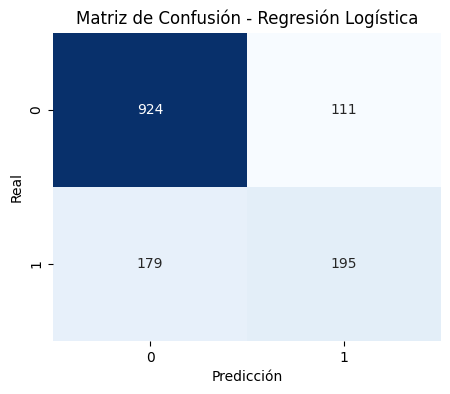

--- Evaluación del modelo: Random Forest ---
Exactitud (Accuracy): 0.7935
Precisión: 0.6456
Recall: 0.4920
F1-score: 0.5584

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      1035
         1.0       0.65      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



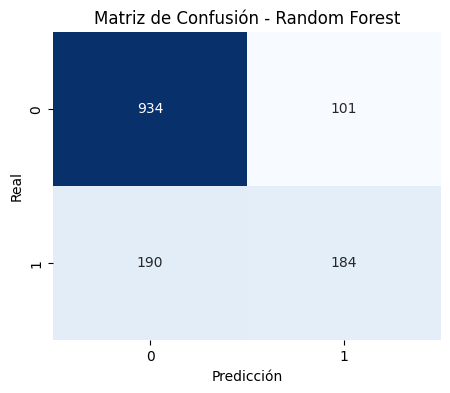

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"--- Evaluación del modelo: {nombre_modelo} ---")
    print(f"Exactitud (Accuracy): {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisión: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print("\nReporte de clasificación:")
    print(classification_report(y_true, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Evaluar Regresión Logística
evaluar_modelo(y_test, y_pred_lr, "Regresión Logística")

# Evaluar Random Forest
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


### Análisis comparativo de modelos

Se evaluaron dos modelos para predecir la cancelación de clientes: Regresión Logística y Random Forest. Los resultados obtenidos en el conjunto de prueba fueron los siguientes:

- **Exactitud (Accuracy):**  
  La Regresión Logística alcanzó un 79.42%, ligeramente superior al 79.35% del Random Forest, siendo una diferencia mínima.

- **Precisión:**  
  Random Forest mostró una precisión del 64.56%, ligeramente mejor que el 63.73% de la Regresión Logística. Esto indica que, de las predicciones positivas que hace, Random Forest es un poco más acertado.

- **Recall:**  
  La Regresión Logística obtuvo un mejor recall (52.14% frente a 49.20%), lo que significa que detecta un mayor porcentaje de clientes que realmente cancelaron.

- **F1-score:**  
  La Regresión Logística también presentó un F1-score más alto (57.35% vs 55.84%), reflejando un mejor balance entre precisión y recall.

En conclusión, ambos modelos presentan un desempeño muy similar, con diferencias leves en las métricas. La Regresión Logística es mejor para identificar a la mayoría de los clientes que cancelan (mayor recall y F1), mientras que Random Forest es un poco más preciso en sus predicciones positivas.

No se observaron indicios claros de overfitting o underfitting en ninguno de los dos modelos, considerando que las métricas corresponden a datos de prueba. Para mejorar, se podría explorar ajuste de hiperparámetros o técnicas específicas para balancear mejor precisión y recall según las necesidades del negocio.


### Overfitting/underfitting?

--- Evaluación del modelo: Regresión Logística (Entrenamiento) ---
Exactitud (Accuracy): 0.8106
Precisión: 0.6707
Recall: 0.5625
F1-score: 0.6119

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      4139
         1.0       0.67      0.56      0.61      1495

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634



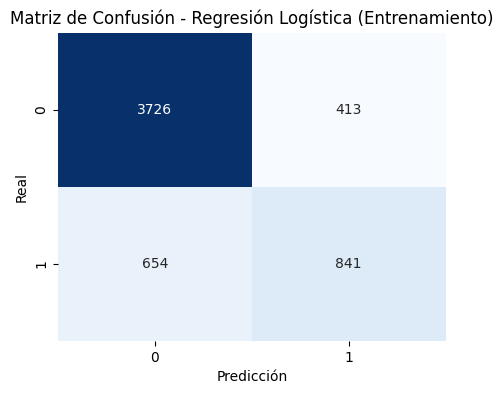

--- Evaluación del modelo: Random Forest (Entrenamiento) ---
Exactitud (Accuracy): 0.9977
Precisión: 0.9940
Recall: 0.9973
F1-score: 0.9957

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4139
         1.0       0.99      1.00      1.00      1495

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



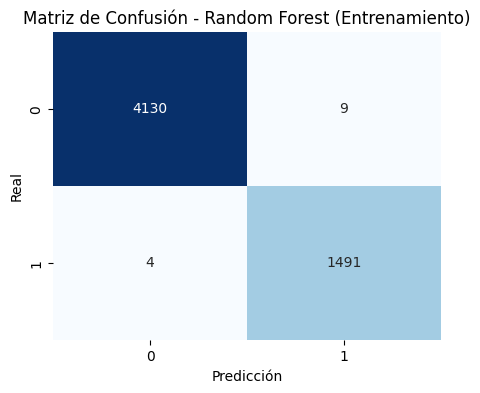

In [55]:
# Predicciones en entrenamiento
y_train_pred_lr = pipeline_lr.predict(X_train)
y_train_pred_rf = rf.predict(X_train_imputed)

# Evaluación entrenamiento Regresión Logística
evaluar_modelo(y_train, y_train_pred_lr, "Regresión Logística (Entrenamiento)")

# Evaluación entrenamiento Random Forest
evaluar_modelo(y_train, y_train_pred_rf, "Random Forest (Entrenamiento)")


### Evaluación de Overfitting / Underfitting

Al comparar el desempeño de los modelos en los conjuntos de entrenamiento y prueba, se observa que:

- **Random Forest** presenta un claro indicio de **overfitting**. Mientras que en el conjunto de entrenamiento logra una exactitud casi perfecta (99.77%) y métricas muy altas de precisión y recall, en el conjunto de prueba su desempeño disminuye significativamente (exactitud ~79.35%, recall ~49.20%). Esto sugiere que el modelo aprendió detalles específicos del conjunto de entrenamiento que no generalizan bien a datos nuevos.

- **Regresión Logística** mostró resultados más consistentes entre entrenamiento y prueba, indicando menor riesgo de overfitting. Esto se debe a que es un modelo más simple y lineal, menos propenso a sobreajustar, aunque también puede tener limitaciones para captar relaciones no lineales en los datos.

**Posibles acciones para mitigar el overfitting en Random Forest incluyen:**

- Limitar la profundidad de los árboles.
- Ajustar parámetros como `min_samples_split` y `min_samples_leaf`.
- Incrementar el número de árboles para mayor estabilidad.
- Seleccionar características relevantes y eliminar ruido.
- Aplicar técnicas de regularización o usar modelos más simples.

En conclusión, es fundamental balancear la complejidad del modelo con su capacidad de generalización para obtener predicciones confiables.


# Análisis de la importqancia de las variables

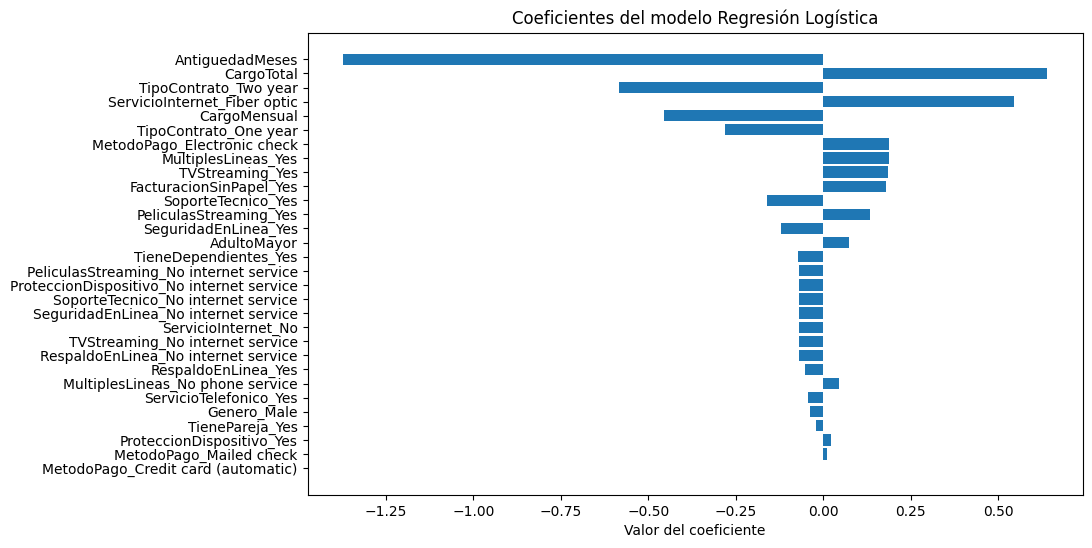

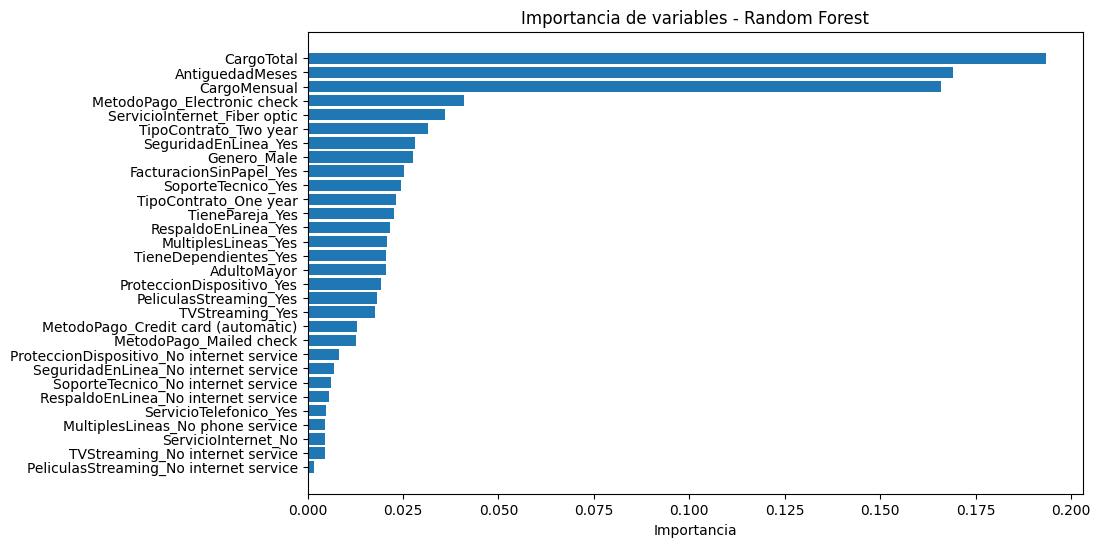

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Para Regresión Logística: coeficientes
coeficientes = pipeline_lr.named_steps['model'].coef_[0]
variables = X_train.columns
coef_df = pd.DataFrame({'Variable': variables, 'Coeficiente': coeficientes})
coef_df['Importancia'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(coef_df['Variable'], coef_df['Coeficiente'])
plt.title('Coeficientes del modelo Regresión Logística')
plt.xlabel('Valor del coeficiente')
plt.gca().invert_yaxis()
plt.show()

# Para Random Forest: importancia de variables
importancias_rf = rf.feature_importances_
rf_df = pd.DataFrame({'Variable': variables, 'Importancia': importancias_rf})
rf_df = rf_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(rf_df['Variable'], rf_df['Importancia'])
plt.title('Importancia de variables - Random Forest')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.show()


### Análisis de la importancia de variables

- **Regresión Logística:**  
  Se analizan los coeficientes asociados a cada variable. Un coeficiente positivo indica que la variable incrementa la probabilidad de cancelación, mientras que uno negativo la disminuye. La magnitud del coeficiente indica la fuerza del efecto.

- **Random Forest:**  
  Se evalúa la importancia basada en la reducción de impurezas en las divisiones de los árboles. Variables con mayor importancia son las que más contribuyen a diferenciar entre clientes que cancelan y los que no.

Este análisis permite identificar las variables más influyentes para predecir la cancelación, lo que ayuda tanto a interpretar el modelo como a priorizar áreas de acción para retener clientes.


## Conclusión

En este análisis predictivo sobre la cancelación de clientes, se desarrollaron y evaluaron dos modelos principales: Regresión Logística y Random Forest. Ambos modelos demostraron ser útiles para predecir la cancelación con una exactitud cercana al 79%, aunque con diferencias en la precisión y recall.

### Factores clave que influyen en la cancelación

- **Variables destacadas en Regresión Logística:**  
  El análisis de coeficientes reveló que variables como el tiempo de contrato, el gasto mensual y la modalidad de contrato tienen un impacto significativo en la probabilidad de cancelación. Coeficientes positivos indican factores que aumentan el riesgo de cancelación, mientras que coeficientes negativos señalan elementos protectores.

- **Importancia de variables en Random Forest:**  
  Este modelo destacó variables similares, con énfasis adicional en servicios asociados como el soporte técnico y opciones de streaming. La importancia relativa sugiere que ciertas características del servicio y métodos de pago también influyen notablemente en la decisión de cancelar.

### Estrategias de retención propuestas

Basándose en los factores identificados, se recomiendan las siguientes acciones para reducir la tasa de cancelación:

- **Fidelización a través de contratos más largos:** Incentivar a los clientes para que opten por contratos anuales o bienales, ya que la duración del contrato está asociada a menor cancelación.

- **Optimización de servicios adicionales:** Mejorar la calidad y oferta de soporte técnico, servicios en línea y streaming, que impactan directamente en la satisfacción del cliente.

- **Personalización del método de pago y facturación:** Facilitar métodos de pago preferidos y promover la facturación sin papel para agilizar procesos y mejorar la experiencia del usuario.

- **Monitoreo proactivo del gasto mensual:** Detectar cambios abruptos en los cargos mensuales que puedan anticipar una posible cancelación y actuar con ofertas o soporte personalizado.

### Consideraciones finales

Este análisis permite no solo predecir la cancelación con modelos robustos, sino también comprender los factores que la impulsan, permitiendo a la empresa diseñar estrategias focalizadas para retener clientes y mejorar la fidelidad a largo plazo.

Para futuros trabajos, se sugiere explorar técnicas avanzadas de balanceo de clases, ajuste de hiperparámetros y la inclusión de variables adicionales para mejorar la precisión y la interpretabilidad de los modelos.
